# Introduction to Geostatistics - Kriging

> conda install -c conda-forge pykrige
> 
> conda install jupyter matplotlib

**Note**: `pykrige` should be installed in its own conda environment, since it enforces many downgrades in already installed packages (python, numpy, gstools, pandas, rasterio, etc.), which might create conflicts with other notebooks.


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 0.11914486053026137
Nugget: 1.5628238242778756e-10 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



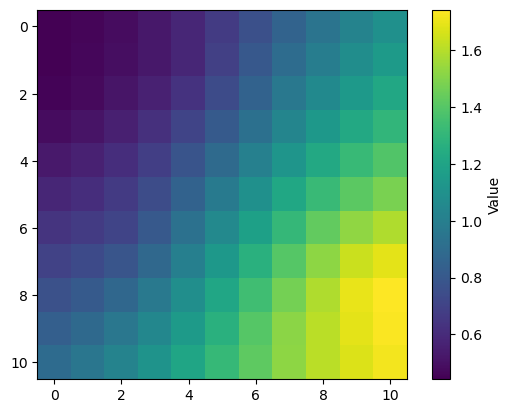

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

# create a 2D dataset together with the associated x, y grids.
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object with linear variogram model
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=True,
    enable_plotting=False,
)

z, ss = OK.execute("grid", gridx, gridy)

kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.colorbar(label='Value')
plt.show()

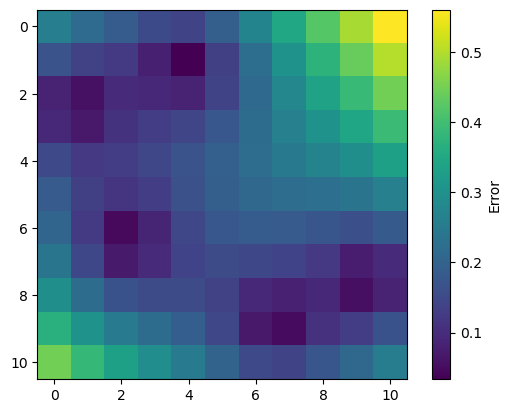

In [7]:
plt.imshow(ss)
plt.colorbar(label='Error')
plt.show()

### Example with gstools and pykrige

- GSTools provides finer variogram calculation and modelling.
- Pykrige is better for kriging.

Combining the two provides both...

In [ ]:
from matplotlib import pyplot as plt
from pykrige.ok import OrdinaryKriging
import gstools as gs
import numpy as np

x = np.array([-100, 280, -290, 23, 101, 110])
y = np.array([54, 100, 590, 470, 200, 25])
z = np.array([29.3, 21.0, 19.2, 29.1, 21.9, 23.1])

model = gs.Exponential(dim=2)
bin_center, gamma = gs.vario_estimate(
    pos=[x, y],
    field=z,
    bin_edges=range(0, 900, 150),
    estimator="cressie",
)
model.fit_variogram(bin_center, gamma)
ax = model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)

Ok = OrdinaryKriging(
    x,
    y,
    z,
    variogram_model=model,
    verbose=True,
    enable_plotting=True
)

gridx =np.arange(-300, 300, 10, dtype='float64')
gridy =np.arange(0,600, 10, dtype='float64')
zstar, ss = Ok.execute("grid", gridx, gridy)

cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c=z, marker=".")
cbar = plt.colorbar(cax)
plt.title('Test Interpolation')
plt.show()